# Time Series EDA & ARIMA analysis

In this project we will come up with insights and a time series analysis about a high speed jet propulsion technology.

![speedtrain](https://media1.giphy.com/media/3oz8xtBx06mcZWoNJm/giphy.gif?cid=ecf05e47cs1pmjh569om2oea0p7scgjqjvzjrobo6qccw9cj&rid=giphy.gif&ct=g)

#### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Matplotlib is building the font cache; this may take a moment.


#### Loading data

In [2]:
test = pd.read_csv("Test.csv")
train = pd.read_csv("Train.csv")

In [3]:
test_original = test.copy()
train_original = train.copy()

### Looking into the data

In [4]:
train.head(3)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6


In [5]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [6]:
test.head(3) # We will make predictions on the passengers count

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        5112 non-null   int64 
 1   Datetime  5112 non-null   object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


It is necessary to change datetime from object to datetime format

In [8]:
train['Datetime'] = pd.to_datetime(train['Datetime'], infer_datetime_format = True)
test['Datetime'] = pd.to_datetime(test['Datetime'], infer_datetime_format = True)

Extracting year, month, day and hour

In [9]:
for i in (train, test):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['hour'] = i.Datetime.dt.hour

In [10]:
train.head()

,ID,Datetime,Count,year,month,day,hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [11]:
train['Day of Week'] = train['Datetime'].dt.dayofweek # Takes from Datetime column the day of the week in a new one

Note: Saturday is day 5 and sunday is day 6

In [12]:
train.sample(5)

,ID,Datetime,Count,year,month,day,hour,Day of Week
7094,7094,2013-06-16 14:00:00,16,2013,6,16,14,6
9173,9173,2013-09-11 05:00:00,44,2013,9,11,5,2
16335,16335,2014-07-06 15:00:00,234,2014,7,6,15,6
13479,13479,2014-03-09 15:00:00,132,2014,3,9,15,6
9670,9670,2013-10-01 22:00:00,284,2013,10,1,22,1


Now we will generate a new column to know if that day is a weekday or not

In [13]:
def applyer(row): # Only for datetime rows!
    if row.dayofweek == 5 or row.dayofweek ==6:
        return 1
    else:
        return 0

In [14]:
train['Weekend'] = train['Datetime'].apply(applyer)
train.sample(5)

,ID,Datetime,Count,year,month,day,hour,Day of Week,Weekend
7548,7548,2013-07-05 12:00:00,46,2013,7,5,12,4,0
9006,9006,2013-09-04 06:00:00,74,2013,9,4,6,2,0
17715,17715,2014-09-02 03:00:00,304,2014,9,2,3,1,0
8656,8656,2013-08-20 16:00:00,182,2013,8,20,16,1,0
12081,12081,2014-01-10 09:00:00,94,2014,1,10,9,4,0


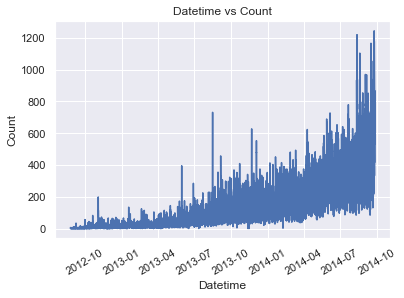

In [15]:
sns.set_theme(style="darkgrid")
# Plot the responses for different events and regions
sns.lineplot(x="Datetime", y="Count", data=train)
plt.xticks(rotation=30)
plt.title('Datetime vs Count')
plt.show()

## EDA

Will traffic increase as years pass by??

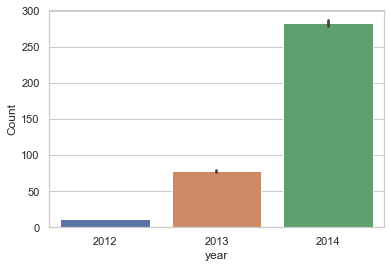

In [16]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="year", y="Count", data=train)

Let's see passenger distribution through the year

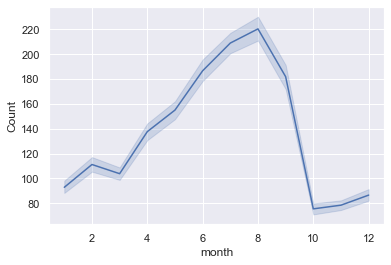

In [17]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="month", y="Count",
             data=train)
plt.show()

There is a decrease in the passenger count the last months of the year. This doesn't make much sense. Lets filter only 2013 and 2014 values

In [18]:
years = [2013, 2014]
Data_20134 = train.loc[(train['year'] == 2013) | (train['year'] == 2014)]

#### Hourly analysis

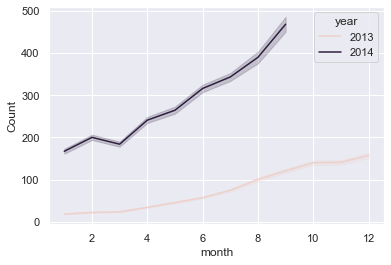

In [19]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="month", y="Count", hue='year',
             data=Data_20134)
plt.show()

Conclusion:

We check our previous insight, there is more people as years go by. Also, we don't have information yet about the last three 2014 months so we should look into years separatedly.

#### Daily analysis

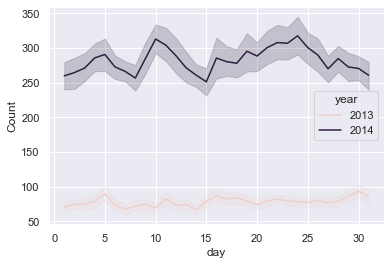

In [20]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="day", y="Count", hue='year',
             data=Data_20134)
plt.show()

There isn't a clear conclusion about the passenger distribution along the month. We may get more meaningful conclusions looking into weekdays or not.

#### Hourly analysis

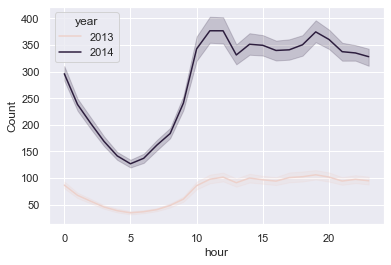

In [21]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="hour", y="Count", hue='year',
             data=Data_20134)
plt.show()

There is a passenger count drop around 1 am. People begin traveling to work at around 6 / 7 am and keep traveling constantly during the day.

#### Weekend analysis

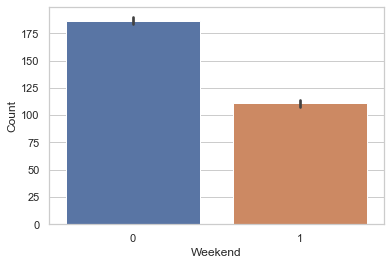

In [22]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Weekend", y="Count", data=Data_20134)

People tend to travel more on weekdays!

In [23]:
Data_20134.head(3)

,ID,Datetime,Count,year,month,day,hour,Day of Week,Weekend
3096,3096,2013-01-01 00:00:00,20,2013,1,1,0,1,0
3097,3097,2013-01-01 01:00:00,44,2013,1,1,1,1,0
3098,3098,2013-01-01 02:00:00,28,2013,1,1,2,1,0


#### Splitting data into training and validation

Train data is the set used for learning (by the model), that is, to fit the parameters to the machine learning model while the validation set is used to provide an evaluation of a model fitted on the training dataset while tuning model hyperparameters.

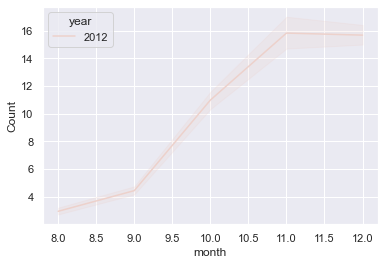

In [24]:
years = [2012]
Data_2012 = train.loc[(train['year'] == 2012)]

sns.set_theme(style="darkgrid")
sns.lineplot(x="month", y="Count", hue='year',
             data=Data_2012)
plt.show()

We have only four months in 2012 training set. In total we have 8 + 12 + 9 = 29 months of data.

To make a validation set, we will use only 20% of the data.

In [25]:
train.head(3)

,ID,Datetime,Count,year,month,day,hour,Day of Week,Weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1


In [26]:
train = train[['ID', 'Datetime', 'year', 'month', 'day', 'hour', 'Day of Week', 'Weekend', 'Count']] # Reordering columns

In [36]:
X = train.iloc[:,0:8].values # Keeping values before splitting

y = train.iloc[:,-1].values

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1) # Using test as validadion. We already have test dataset.